# Multiple Linear Regression

---

### **Definition:**
Multiple Linear Regression is a statistical method used to model the relationship between one dependent variable and two or more independent variables. The formula for the regression line is:

$$
y = m_1x_1 + m_2x_2 + m_3x_3 + \dots + m_nx_n + c + \epsilon
$$

- $y$: Dependent variable (response).  
- $x_1, x_2, \dots, x_n$: Independent variables (predictors).  
- $m_1, m_2, \dots, m_n$: Coefficients (slopes) corresponding to each predictor $x_1, x_2, \dots, x_n$.  
- $c$: Intercept (value of $y$ when all $x_i = 0$).  
- $\epsilon$: Error term (captures deviations).

---

### **Process:**

1. **Importing Required Library:**
   - Use `LinearRegression` from `sklearn.linear_model`.

2. **Preparing Data:**
   - Organize data into:
     - $X$: Matrix of features (independent variables).  
     - $y$: Dependent variable (response).  
   - Perform train-test splitting to divide data into training and testing sets.

3. **Model Training:**
   - Fit the `LinearRegression` model on the training data ($X_{\text{train}}, y_{\text{train}}$).

4. **Making Predictions:**
   - Use the trained model to predict labels for test features ($X_{\text{test}}$).

5. **Evaluating Performance:**
   - Assess model accuracy using metrics such as:
     - **Mean Squared Error (MSE):**  
       $$
       \text{MSE} = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2
       $$
     - **R-squared ($R^2$) score:**  
       $$
       R^2 = 1 - \frac{\sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2}{\sum_{i=1}^n \left( y_i - \bar{y} \right)^2}
       $$

---

### **Key Outputs:**
1. **Intercept ($c$):** The value of $y$ when all $x_i = 0$.  
2. **Coefficients ($m_1, m_2, \dots, m_n$):** Indicate the impact of each independent variable on $y$.  
3. **Predicted Values ($\hat{y}$):** The model's outputs for given inputs.

---

### **Purpose:**
Multiple Linear Regression is used to predict outcomes based on several predictor variables, allowing analysis of complex relationships between variables.

---

### **Assumptions:**
1. **Linearity:** The relationship between predictors and response is linear.  
2. **Independence:** Observations are independent.  
3. **Homoscedasticity:** Constant variance of errors.  
4. **Normality:** Errors are normally distributed.  
5. **Multicollinearity:** Predictors are not highly correlated with each other.


In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### **Process:**

1. **Importing Libraries and Loading Data:**
   - The dataset is loaded into a DataFrame from a CSV file using `pd.read_csv('Salary_Data.csv')`. The first few rows of the dataset are displayed using `salary_data.head()`.
   - The shape and missing values in the dataset are checked using `salary_data.shape` and `salary_data.isnull().sum()`.

2. **Handling Missing Data:**
   - Missing values in the columns 'Age', 'Experience', and 'Salary' are replaced with the most frequent value (mode) of that column using `fillna()`. This ensures that there are no null values in the dataset.

3. **Exploratory Data Analysis (EDA):**
   - A pairplot of the dataset is generated using `sns.pairplot()` to visualize the relationships between all variables in the dataset.
   - A correlation heatmap is plotted using `sns.heatmap()` to visualize the correlations between the features, revealing strong correlations between 'Salary' and both 'Age' (0.92) and 'Experience' (0.93).

4. **Preparing Features and Labels:**
   - The features (independent variables) are selected by excluding the 'Salary' column using `salary_data.iloc[:,:-1]`, while the 'Salary' column is selected as the dependent variable with `salary_data['Salary']`.

5. **Splitting Data into Train and Test Sets:**
   - The data is split into training and testing sets using `train_test_split()`. The test size is set to 20% (`test_size=0.2`), and the random state is fixed for reproducibility (`random_state=42`).

6. **Model Training:**
   - A `LinearRegression` model is initialized and trained on the training set (`x_train`, `y_train`) using `lr.fit(x_train, y_train)`.

7. **Model Evaluation:**
   - The model's performance is evaluated on the test set (`x_test`, `y_test`) using the `score()` method, which returns the R-squared value. In this case, the model achieved an R-squared score of **88.44%**.

8. **Extracting Coefficients and Intercept:**
   - The coefficients ($m_1, m_2$) and intercept ($c$) of the trained model are extracted using `lr.coef_` and `lr.intercept_`. These values represent the relationship between the features (Age and Experience) and the dependent variable (Salary).
   - The formula for the regression line is:  
     $$ y = m_1 \cdot \text{Age} + m_2 \cdot \text{Experience} + c $$

9. **Finding the Best Random State:**
   - A loop is used to evaluate the model performance over 100 different random states. For each iteration, the data is split into training and testing sets, and the model is trained and evaluated. The highest R-squared score is recorded along with the corresponding random state.
   - The maximum R-squared score obtained is **92.44%** with a random state of **25**.

10. **Final Model with Best Random State:**
    - The final model is trained with the best random state (random_state=25), and the coefficients and intercept are extracted again. This provides the best possible model with the highest performance on the dataset.

---

### **Key Outputs:**
1. **Model Performance:**  
   - The R-squared score for the initial model was **88.44%**.  
   - The maximum R-squared score achieved after testing various random states is **92.44%** with random state **25**.

2. **Model Coefficients and Intercept:**  
   - The coefficients of the model are denoted as $m_1$ and $m_2$ corresponding to 'Age' and 'Experience', respectively, and the intercept is denoted as $c$.

---

### **Conclusion:**
- The Multiple Linear Regression model is able to predict salary based on 'Age' and 'Experience' with high accuracy. The final model with random state 25 provides the best performance, achieving an R-squared score of **92.44%**.


In [119]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data.head()

,Age,Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [120]:
salary_data.shape

(375, 3)

In [121]:
salary_data.isnull().sum()

Age           2
Experience    2
Salary        2
dtype: int64

In [122]:
salary_data['Age'].fillna(salary_data['Age'].mode()[0], inplace=True)
salary_data['Experience'].fillna(salary_data['Experience'].mode()[0], inplace=True)
salary_data['Salary'].fillna(salary_data['Salary'].mode()[0], inplace=True)

salary_data.isnull().sum()


C:\Users\Durjay\AppData\Local\Temp\ipykernel_15584\2191425939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salary_data['Age'].fillna(salary_data['Age'].mode()[0], inplace=True)
C:\Users\Durjay\AppData\Local\Temp\ipykernel_15584\2191425939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

Age           0
Experience    0
Salary        0
dtype: int64

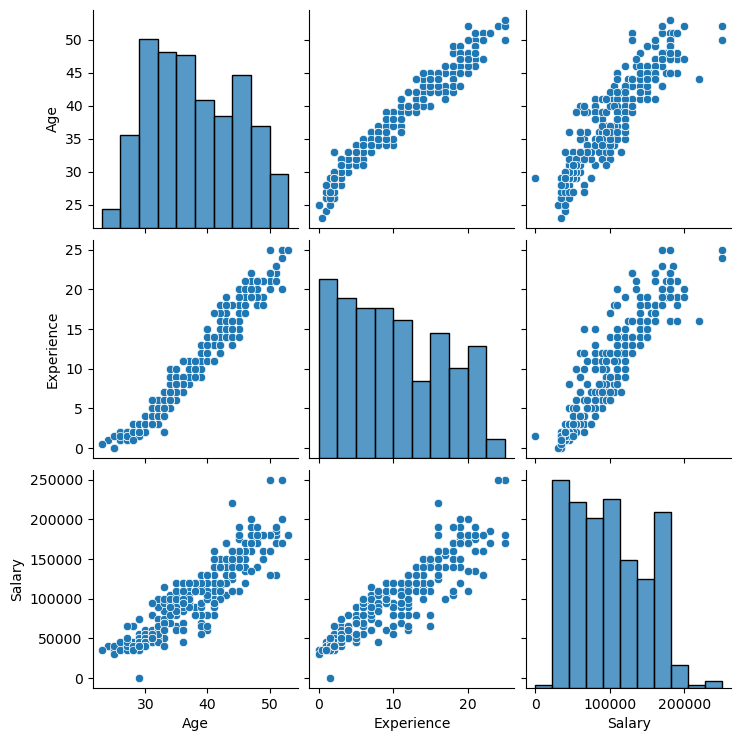

In [123]:
sns.pairplot(data=salary_data)
plt.show()

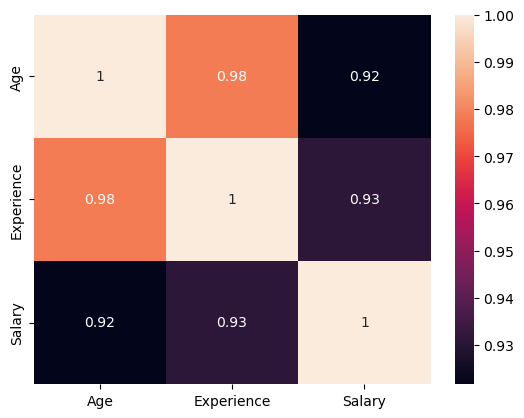

In [124]:
sns.heatmap(data=salary_data.corr(), annot=True)
plt.show()

In [125]:
x = salary_data.iloc[:,:-1]
x.head(3)

,Age,Experience
0,32.0,5.0
1,28.0,3.0
2,45.0,15.0


In [126]:
y = salary_data['Salary']
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

In [127]:
x.ndim, y.ndim

(2, 1)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [129]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test, y_test)

0.8844076700248489

In [130]:
m = lr.coef_
c=lr.intercept_

m, c

(array([2584.73166607, 4105.56568659]), -38150.48407991532)

In [131]:
salary_data.columns

Index(['Age', 'Experience', 'Salary'], dtype='object')

In [132]:
# y = m[0]x1 + m[1]x2 + c
# y = m[0]*Age + m[1]*Experience + c

In [134]:
rs = 100
max_score = 0
max_score_rs = 0

for i in range(1,rs):
    x_train, x_tet, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    current_score = lr.score(x_tet, y_test)
    if current_score>max_score:
        max_score = current_score
        max_score_rs = i
        
print(f"Max Score : {max_score} with random state :{max_score_rs}")

Max Score : 0.9244491875559092 with random state :25


In [135]:
x_train, x_tet, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=25)
best_lr = LinearRegression()
best_lr.fit(x_train, y_train)

LinearRegression()

In [136]:
m = best_lr.coef_
c = best_lr.intercept_
m,c

(array([1606.95904211, 5068.4051478 ]), -10808.68071270913)